In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [102]:
train = pd.read_csv('/content/Uniqlo_Training.csv')
test = pd.read_csv('/content/Uniqlo_Test.csv')

In [103]:
train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [104]:
train['Date'] = pd.to_datetime(train.Date,format='%Y-%m-%d')
train.index = train['Date']

In [105]:
test['Date'] = pd.to_datetime(test.Date,format='%Y-%m-%d')
test.index = test['Date']

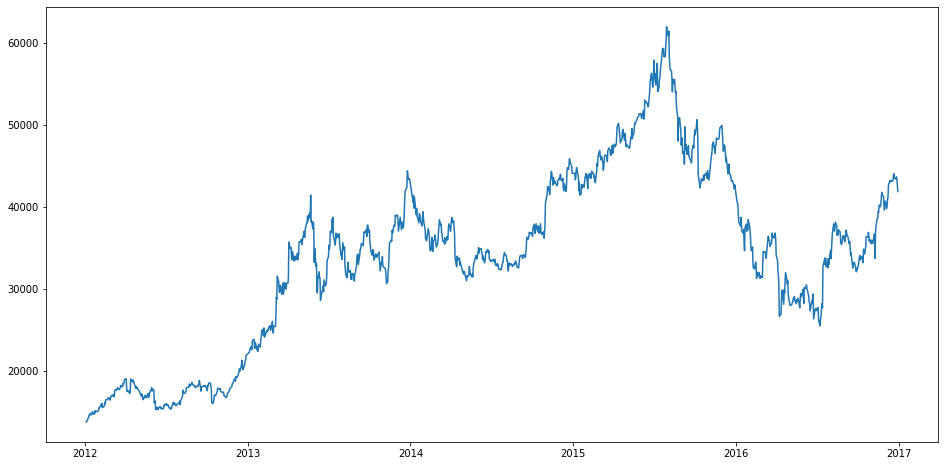

In [106]:
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Close Price history')

In [107]:
data = train.sort_index(ascending=True, axis=0)
data

,Date,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,,
2012-01-04,2012-01-04,14050,14050,13700,13720,559100,7719804000
2012-01-05,2012-01-05,13720,13840,13600,13800,511500,7030811000
2012-01-06,2012-01-06,13990,14030,13790,13850,765500,10635609000
2012-01-10,2012-01-10,13890,14390,13860,14390,952300,13533413000
2012-01-11,2012-01-11,14360,14750,14280,14590,1043400,15191988000
...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,43310,43660,43090,43340,358200,15547803000
2016-12-27,2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-28,2016-12-28,43940,43970,43270,43270,339900,14780670000


In [108]:
test = test.sort_index(ascending=True, axis=0)
test

,Date,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,,
2017-01-04,2017-01-04,42480,43330,42450,43290,648100,27916728000
2017-01-05,2017-01-05,43250,43330,42470,42590,516800,22124250000
2017-01-06,2017-01-06,40500,41030,39720,39720,1435500,57708934000
2017-01-10,2017-01-10,38620,38850,38150,38690,1196900,46107703000
2017-01-11,2017-01-11,38710,38880,38480,38560,545900,21089798000
2017-01-12,2017-01-12,38300,38450,37930,38010,800900,30540359000
2017-01-13,2017-01-13,38900,39380,38240,38430,1321200,51197289000


In [109]:
test.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,,
2017-01-04,2017-01-04,42480,43330,42450,43290,648100,27916728000
2017-01-05,2017-01-05,43250,43330,42470,42590,516800,22124250000
2017-01-06,2017-01-06,40500,41030,39720,39720,1435500,57708934000
2017-01-10,2017-01-10,38620,38850,38150,38690,1196900,46107703000
2017-01-11,2017-01-11,38710,38880,38480,38560,545900,21089798000


In [110]:
train_data = data
test_data = test

In [111]:
print(train_data.shape)
print(test_data.shape)

(1226, 7)
(7, 7)


In [112]:
preds = []
for i in range(0,test_data.shape[0]):
    a = train_data['Close'][len(train_data)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [113]:
rms=np.sqrt(np.mean(np.power((np.array(test_data['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
6008.96951944609


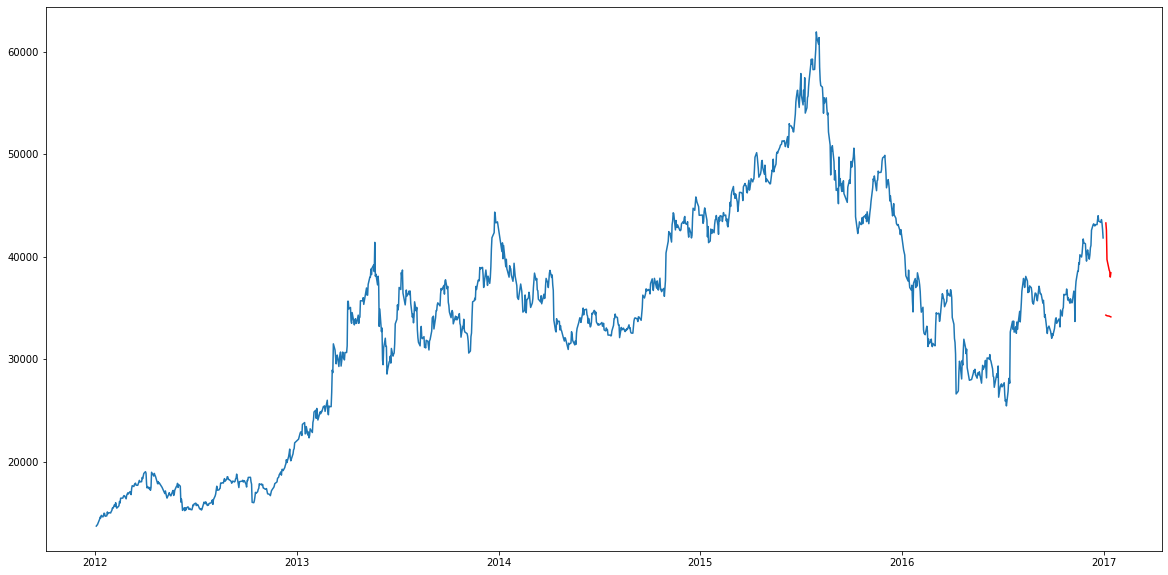

In [114]:
test_data['Predictions'] = 0
test_data['Predictions'] = preds
plt.plot(train_data['Close'])
plt.plot(test_data[['Close', 'Predictions']],'r')

In [115]:
test_data.head()

,Date,Open,High,Low,Close,Volume,Stock Trading,Predictions
Date,,,,,,,,
2017-01-04,2017-01-04,42480,43330,42450,43290,648100,27916728000,34303.084677
2017-01-05,2017-01-05,43250,43330,42470,42590,516800,22124250000,34269.669696
2017-01-06,2017-01-06,40500,41030,39720,39720,1435500,57708934000,34237.853848
2017-01-10,2017-01-10,38620,38850,38150,38690,1196900,46107703000,34203.974227
2017-01-11,2017-01-11,38710,38880,38480,38560,545900,21089798000,34177.982187


# Linear Regression

In [116]:
new_data = pd.DataFrame(index=range(0,len(train_data)),columns=['Date', 'Close'])

In [117]:
for i in range(0,len(train_data)):
    new_data['Date'][i] = train_data['Date'][i]
    new_data['Close'][i] = train_data['Close'][i]

In [118]:
data_test = pd.DataFrame(index=range(0,len(test_data)),columns=['Date', 'Close'])

In [121]:
for i in range(0,len(test_data)):
    data_test['Date'][i] = test_data['Date'][i]
    data_test['Close'][i] = test_data['Close'][i]

In [120]:
from fastai.tabular import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [127]:
from fastai.tabular import  add_datepart
add_datepart(data_test, 'Date')
data_test.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [143]:
train = new_data[:981]
valid = new_data[981:]

In [144]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [145]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

21851.962433006942

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



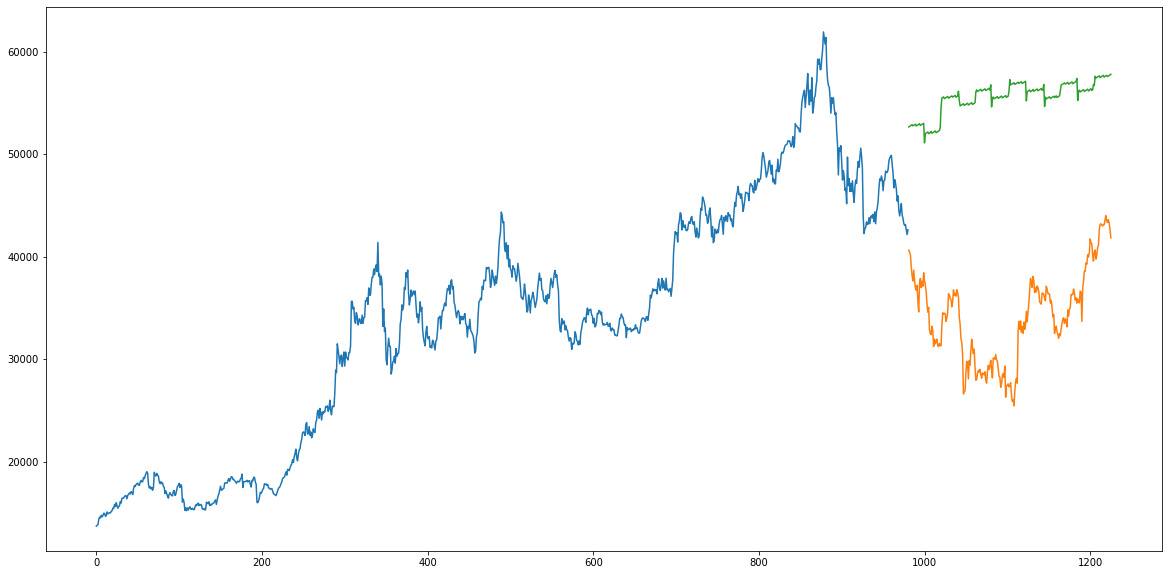

In [148]:
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[981:].index
train.index = new_data[:981].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# KNN


In [149]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [150]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [151]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [152]:
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [153]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

17613.975121088555

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



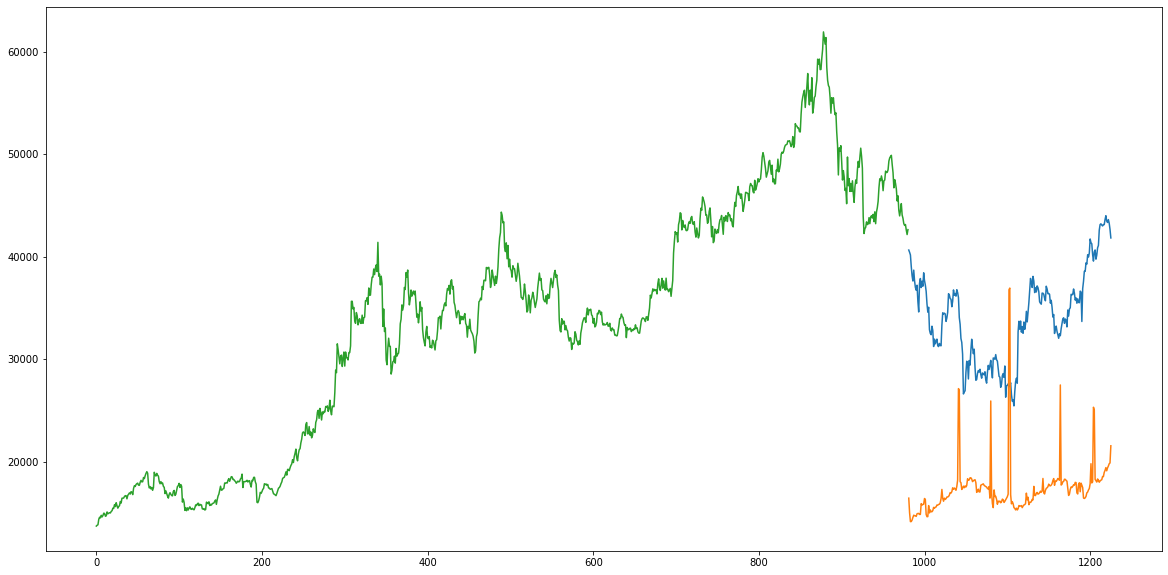

In [154]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

# Prophet

In [35]:
from fbprophet import Prophet

In [36]:
new_data = pd.DataFrame(index=range(0,len(train_data)),columns=['Date', 'Close'])

In [37]:
for i in range(0,len(train_data)):
    new_data['Date'][i] = train_data['Date'][i]
    new_data['Close'][i] = train_data['Close'][i]

In [38]:
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [39]:
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [40]:
train = new_data[:981]
valid = new_data[981:]

In [41]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

In [43]:
forecast_valid = forecast['yhat'][981:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

18544.046824441044

In [44]:
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



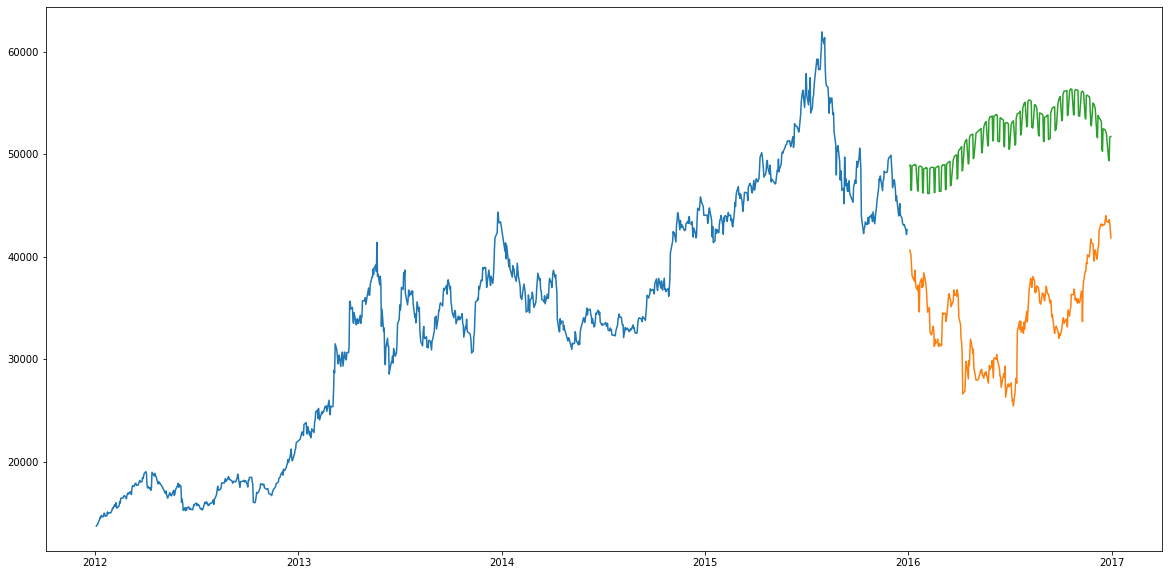

In [45]:
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

# LSTM

In [46]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [47]:
data = train_data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(train_data)),columns=['Date', 'Close'])

In [48]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [49]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [50]:
dataset = new_data.values

In [51]:
train = dataset[0:981,:]
valid = dataset[981:,:]

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [53]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [54]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [55]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [56]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

921/921 - 39s - loss: 0.0026


In [57]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [58]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [59]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [60]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

2163.2339838297576

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



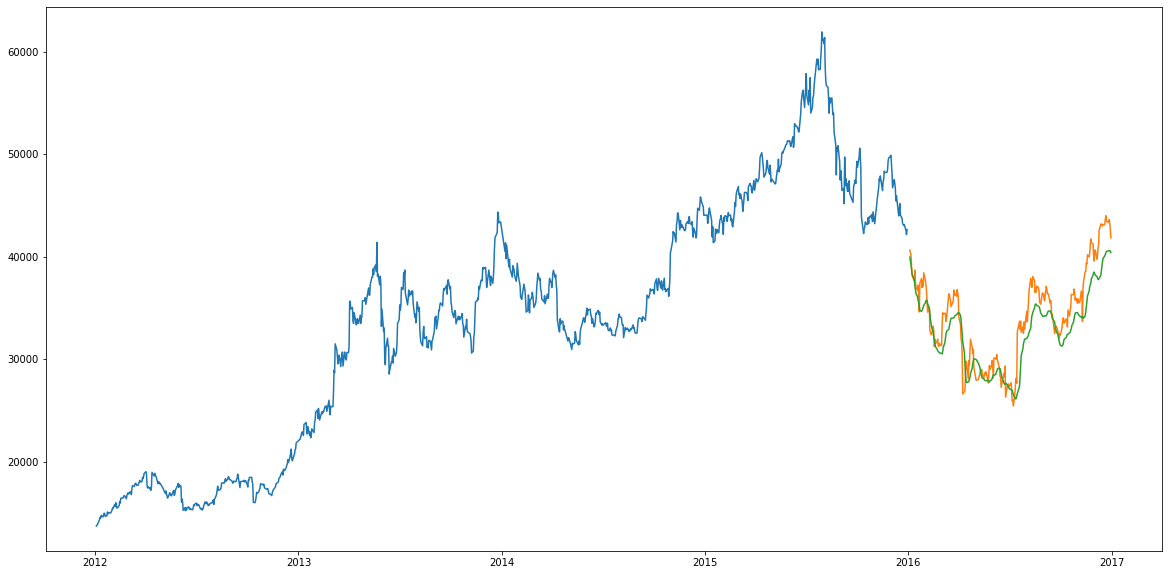

In [62]:
train = new_data[:981]
valid = new_data[981:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])